In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [2]:
train = pd.read_csv("./wdbc-train.csv")
train.head()

,diagnosis,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,...,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
0,0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
1,0,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
2,0,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
3,0,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
4,0,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


In [3]:
train.shape

(455, 31)

In [4]:
test = pd.read_csv("./wdbc-test.csv")
test.head()

,diagnosis,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,...,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
0,1,-0.201756,0.329079,-0.130868,-0.271455,1.029198,0.864118,0.733639,0.856697,1.120328,...,0.031504,0.676289,0.185286,-0.062808,1.103531,0.874443,1.219091,1.389329,1.082033,1.540297
1,0,-0.255558,1.467633,-0.317804,-0.324002,-0.616891,-1.016540,-0.769012,-0.726495,-0.695677,...,-0.390180,1.426216,-0.465282,-0.423883,-0.157482,-0.951752,-0.644332,-0.833694,-0.731316,-0.877325
2,0,-0.026193,-0.840768,-0.091751,-0.132260,-1.215402,-0.941988,-0.857154,-0.575023,-0.805295,...,-0.275547,-1.022124,-0.310399,-0.328279,-1.285756,-0.981828,-1.027447,-0.494838,-1.220809,-0.921159
3,0,0.041767,-0.236588,-0.024635,-0.057911,-2.223804,-1.013566,-0.807228,-0.906497,-0.637214,...,-0.007389,-0.045742,-0.036398,-0.104976,-1.681759,-0.229905,-0.556576,-0.599974,-0.426177,-0.378290
4,0,-0.306528,-0.176411,-0.379156,-0.363413,-0.477601,-1.301861,-0.796034,-0.504734,-1.251074,...,-0.605116,-0.447782,-0.667162,-0.572410,-1.568489,-1.344779,-1.099005,-0.985727,-1.457609,-1.225189


In [5]:
test.shape

(114, 31)

In [21]:
X_train = train.drop("diagnosis",axis=1)
X_train = X_train.values
print("Shape of X_train is : %s"%str(X_train.shape))
y_train = train['diagnosis'].values
print("Shape of y_train is : %s"%str(y_train.shape))

Shape of X_train is : (455, 30)
Shape of y_train is : (455,)


In [22]:
X_test = test.drop("diagnosis",axis=1)
X_test = X_test.values
print("Shape of X_test is : %s"%str(X_test.shape))
y_test = test['diagnosis'].values
print("Shape of y_test is : %s"%str(y_test.shape))

Shape of X_test is : (114, 30)
Shape of y_test is : (114,)


In [25]:
len(train.columns) - 1

30

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(train.columns) - 1]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='RMSprop',loss=keras.losses.binary_crossentropy,metrics=['acc'])
model.summary()
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 1s 2ms/sample - loss: 0.5952 - acc: 0.7077 - val_loss: 0.4991 - val_acc: 0.7632
Epoch 2/10
455/455 [==============================] - 0s 196us/sample - lo

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

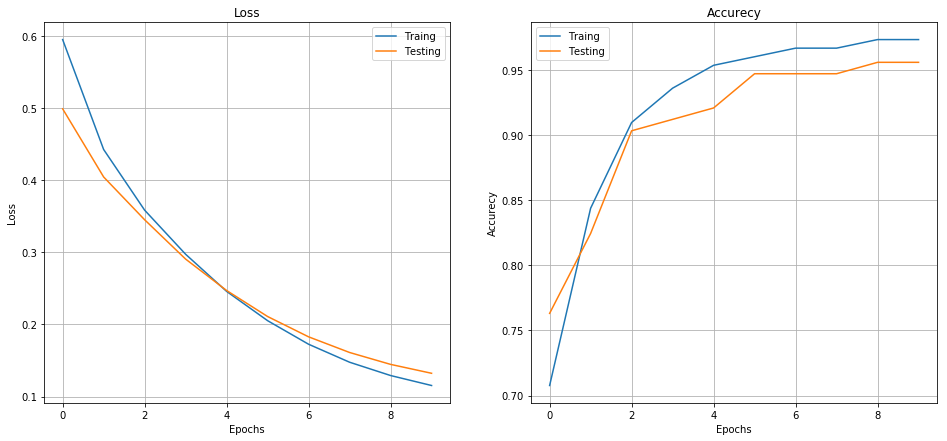

In [32]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,7))
ax1.plot(history.history['loss'],label="Traing")
ax1.plot(history.history['val_loss'],label="Testing")
ax1.set_title("Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['acc'],label="Traing")
ax2.plot(history.history['val_acc'],label="Testing")
ax2.set_title("Accurecy")
ax2.set_ylabel("Accurecy")
ax2.set_xlabel("Epochs")
ax2.legend()
ax2.grid(True)